In [5]:
import sys
sys.path.append('C:\Anaconda3\Lib\site-packages')

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import seaborn as sns
sns.set_context('poster')

import numpy as np
import pandas as pd

import statsmodels.api as sm

## Linear Regression with R datasets
We can access these datasets in python using the `statsmodels` package. Here the `espgh` dataset is used.
#### The data is from a case-control study of (o)esophageal cancer in Ille-et-Vilaine, France.

In [6]:
esoph = sm.datasets.get_rdataset('esoph')
esoph

<class 'statsmodels.datasets.utils.Dataset'>

We need to clean it up a bit. This is why we need the dictionaries in the cell below.

In [8]:
# Making dictionaries to use as key lookups

# Age groups
agegp = {1: '25-34', 2: '35-44', 3: '45-54', 4: '55-64', 5: '65-74', 6: '75+'}
agegp_inv = {v: k for v, k in zip(agegp.values(), agegp.keys())}

# Alcohol consumption in g/day
alcgp = {1: '0-39', 2: '40-79', 3: '80-119', 4: '120+'}
alcgp_inv = {v: k for v, k in zip(alcgp.values(), alcgp.keys())}

# Tobacco consumption in g/day
tobgp = {1: '0-9', 2: '10-19', 3: '20-29', 4: '30+'}
tobgp_inv = {v: k for v, k in zip(tobgp.values(), tobgp.keys())}

In [7]:
df = esoph.data
# Rename a column
df.columns = ['Age_group']+list(df.columns[1:])
df

,Age_group,alcgp,tobgp,ncases,ncontrols
0,25-34,0-39g/day,0-9g/day,0,40
1,25-34,0-39g/day,10-19,0,10
2,25-34,0-39g/day,20-29,0,6
3,25-34,0-39g/day,30+,0,5
4,25-34,40-79,0-9g/day,0,27
5,25-34,40-79,10-19,0,7
6,25-34,40-79,20-29,0,4
7,25-34,40-79,30+,0,7
8,25-34,80-119,0-9g/day,0,2
9,25-34,80-119,10-19,0,1


In [67]:
print(agegp)
print(agegp_inv)

{1: '25-34', 2: '35-44', 3: '45-54', 4: '55-64', 5: '65-74', 6: '75+'}
{'25-34': 1, '55-64': 4, '65-74': 5, '35-44': 2, '75+': 6, '45-54': 3}


Add features ...

In [9]:
df['positive_frac'] = df.ncases/df.ncontrols

Clean a little bit more ...

In [10]:
df['alcgp'] = list(map(lambda age: age.split('g')[0], df['alcgp']))
df['tobgp'] = list(map(lambda age: age.split('g')[0], df['tobgp']))
df.head()

,Age_group,alcgp,tobgp,ncases,ncontrols,positive_frac
0,25-34,0-39,0-9,0,40,0
1,25-34,0-39,10-19,0,10,0
2,25-34,0-39,20-29,0,6,0
3,25-34,0-39,30+,0,5,0
4,25-34,40-79,0-9,0,27,0


In [11]:
df['Age_group_i'] = list(map(lambda key: agegp_inv[key], df['Age_group']))
df['alcgp'] = list(map(lambda key: alcgp_inv[key], df['alcgp']))
df['tobgp'] = list(map(lambda key: tobgp_inv[key], df['tobgp']))
df.head()

,Age_group,alcgp,tobgp,ncases,ncontrols,positive_frac,Age_group_i
0,25-34,1,1,0,40,0,1
1,25-34,1,2,0,10,0,1
2,25-34,1,3,0,6,0,1
3,25-34,1,4,0,5,0,1
4,25-34,2,1,0,27,0,1


In [12]:
df.dtypes

Age_group         object
alcgp              int64
tobgp              int64
ncases             int64
ncontrols          int64
positive_frac    float64
Age_group_i        int64
dtype: object

Okay great. Now we can get pandas to do some work for us.

In [13]:
df.describe()

,alcgp,tobgp,ncases,ncontrols,positive_frac,Age_group_i
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,2.454545,2.409091,2.272727,11.079545,0.346807,3.386364
std,1.123511,1.120718,2.753169,12.722703,0.357342,1.650021
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
25%,1.000000,1.000000,0.000000,3.000000,0.000000,2.000000
50%,2.000000,2.000000,1.000000,6.000000,0.267857,3.000000
75%,3.000000,3.000000,4.000000,14.000000,0.583333,5.000000
max,4.000000,4.000000,17.000000,60.000000,1.000000,6.000000


What I notice is that ~30% of the group, on average, were diagnosed positive for the disease. That being said, the sample size was small and the standard deviation ends up being quite large.

In [86]:
df.dtypes

agegp              int64
alcgp              int64
tobgp              int64
ncases             int64
ncontrols          int64
positive_frac    float64
dtype: object

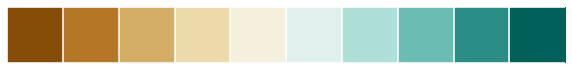

In [14]:
colors = sns.color_palette("BrBG", 10)
sns.palplot(sns.color_palette("BrBG", 10))

#### Using seaborn to do kernel density estimates

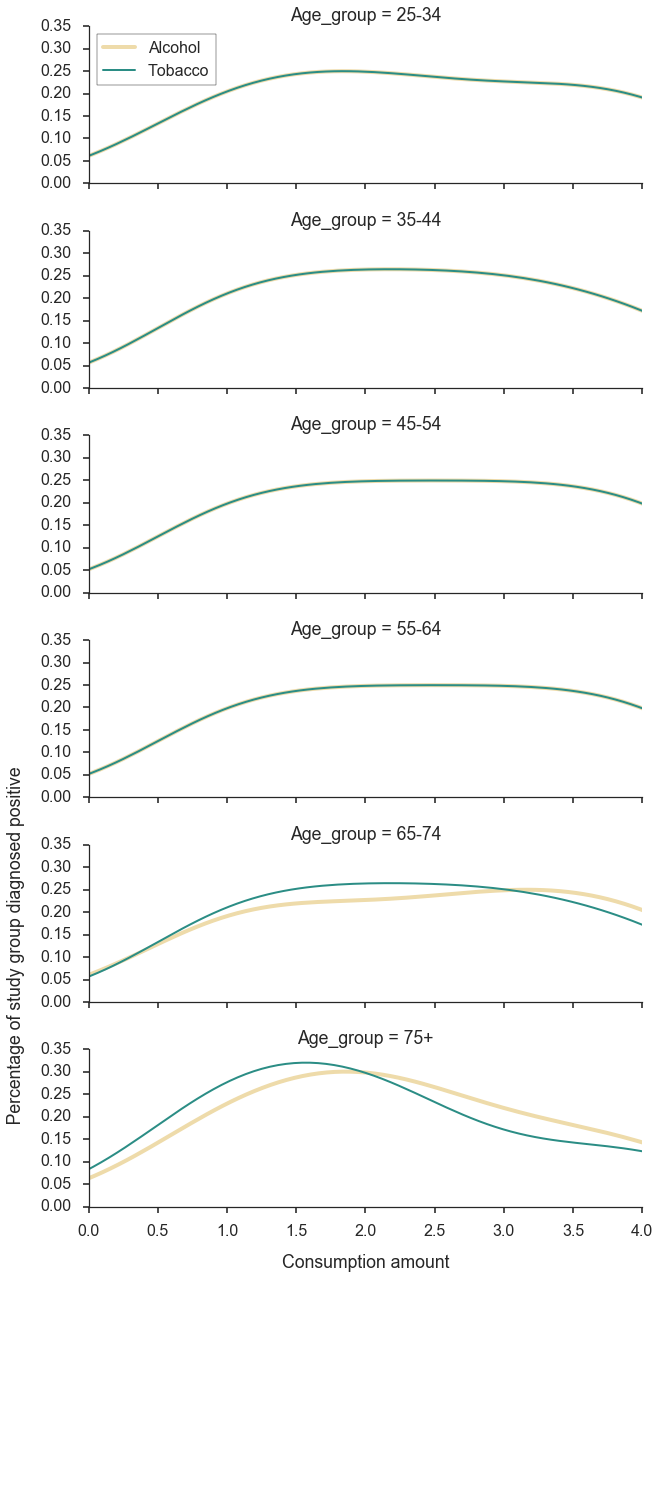

In [320]:
g = sns.FacetGrid(df, row="Age_group", #row_order=ordered_days,
                  size=3, aspect=3, legend_out=False)
g.map(sns.distplot, "alcgp", hist=False, rug=False, color=colors[3], label='Alcohol', axlabel='Consumption group',
      kde_kws={'linewidth': 4});
g.map(sns.distplot, "tobgp", hist=False, rug=False, color=colors[-2], label='Tobacco', axlabel='Consumption group',
      kde_kws={'linewidth': 2});
plt.xlim(0,4)
plt.xlabel('Consumption amount', labelpad=15)
plt.ylabel('                                                                           Percentage of study group diagnosed positive', labelpad=15)
g.add_legend(frameon=True)
plt.savefig('figures/seaborn_kde_by_age.png', bbox_inches='tight', dpi=144)

#### Single variable linear models $y = m_0 + m_1 x$

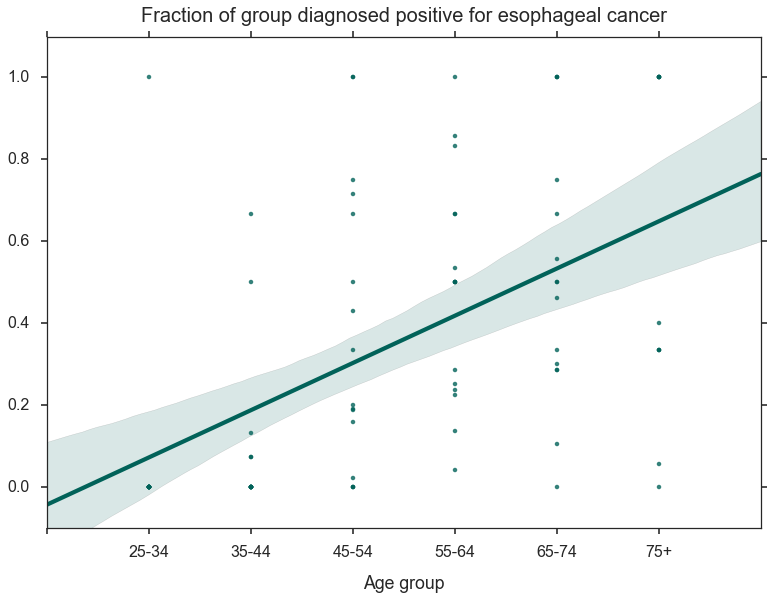

In [15]:
sns.set_style('ticks')
#plt.scatter(list(df.Age_group_i), list(df.positive_frac),
#            alpha=0.5, linewidths=5, marker='o',
#            s=[w*10 for w in df.ncases])
sns.regplot(y='positive_frac', x='Age_group_i', data=df,
            fit_reg = True, marker='o', color=colors[-1])
plt.title('Fraction of group diagnosed positive for esophageal cancer',
          fontsize=20, y=1.02)
plt.xlabel('Age group', labelpad=15)
plt.ylabel('')
plt.xticks(range(7), ['', '25-34', '35-44', '45-54', '55-64', '65-74', '75+', ''])
plt.ylim(-0.1,1.1)
plt.savefig('figures/lm_age.png', bbox_inches='tight', dpi=144)
plt.show()

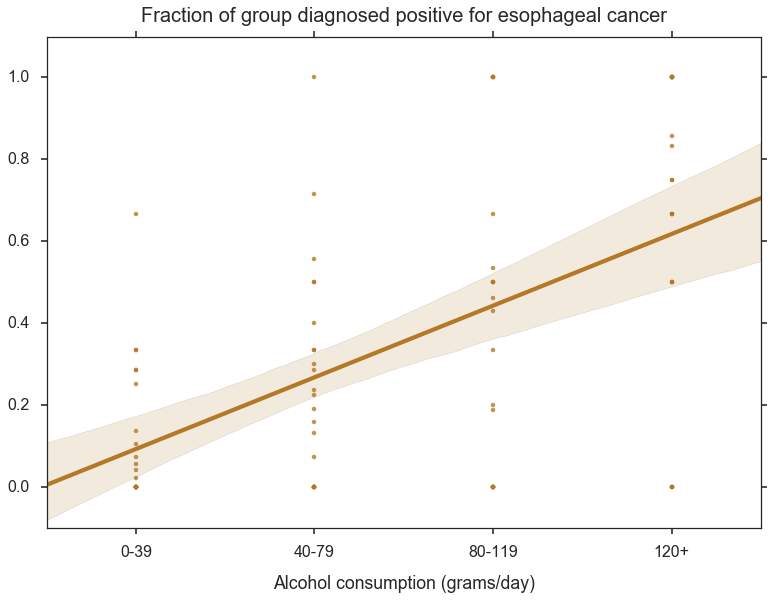

In [16]:
sns.set_style('ticks')
#plt.scatter(list(df.alcgp), list(df.positive_frac),
 #           alpha=0.5, linewidths=5, marker='x')
sns.regplot(y='positive_frac', x='alcgp', data=df,
            fit_reg = True, marker='o', color=colors[1])
plt.title('Fraction of group diagnosed positive for esophageal cancer',
          fontsize=20, y=1.02)
plt.xlabel('Alcohol consumption (grams/day)', labelpad=15)
plt.xticks(range(5), ['', '0-39', '40-79', '80-119', '120+', ''])
plt.ylim(-0.1,1.1)
plt.xlim(0.5,4.5)
plt.ylabel('')
plt.savefig('figures/lm_alcohol.png', bbox_inches='tight', dpi=144)

plt.show()

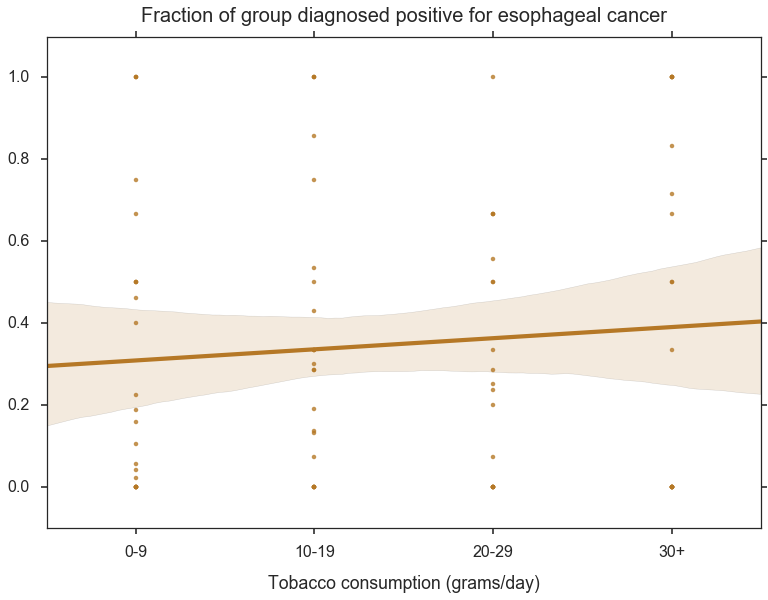

In [17]:
sns.set_style('ticks')
#plt.scatter(list(df.tobgp), list(df.positive_frac),
#            alpha=0.5, linewidths=5, marker='x')
sns.regplot(y='positive_frac', x='tobgp', data=df,
            fit_reg = True, marker='o', color=colors[1])

plt.title('Fraction of group diagnosed positive for esophageal cancer',
          fontsize=20, y=1.02)
plt.xlabel('Tobacco consumption (grams/day)', labelpad=15)
plt.xticks(range(6), ['', '0-9', '10-19', '20-29', '30+', ''])
plt.ylim(-0.1,1.1)
plt.xlim(0.5,4.5)
plt.ylabel('')
plt.savefig('figures/lm_tobacco.png', bbox_inches='tight', dpi=144)

plt.show()

### Multivariate models
We'll build a model to predict the "likelyhood" cancer depending on 3 variables. The hyperplane will look like this:

$$ y = m_0 + m_1 x_1 + m_2 x_2 + m_3 x_3$$

where $m_0$ is the intercept and the other $m$'s are the slopes. We have 3 independent variables:
    - age
    - alcohol comsumption
    - tobacco consumption

To give you a better understanding of what I mean by hyperplane, let's first fit to a model with only 2 features: $x_1=$ 'alcohol consumption' and $x_2=$ 'tobacco consumption'. With this model we'll be able to plot the resulting "plane of best fit".

Before we get into it, lets's define a case to feed into each model and determine predictions for the percentage of positive diagnoses. Let's pick a more extreme case to hopefully see larger variations between the different models:
     - age => group 4 (55-64 years)
     - alcohol => group 3 (80-119 g/day)
     - tobacco => group 4 (130+ g/day)

In [18]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Two feature linear model with intercept

In [19]:
reg = ols('positive_frac ~ alcgp + tobgp', df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          positive_frac   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     19.62
Date:                Mon, 02 May 2016   Prob (F-statistic):           9.84e-08
Time:                        15:27:14   Log-Likelihood:                -17.103
No. Observations:                  88   AIC:                             40.21
Df Residuals:                      85   BIC:                             47.64
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.1738      0.106     -1.645      0.104        -0.384     0.036
alcgp          0.1769      0.029      6.192      0.000         0.120     0.234
tobgp          0.0359      0.029      1.252      0.214        -0.021     0.093
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.087
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.228
Skew:                          -0.055   Prob(JB):                        0.892
Kurtosis:                       2.776   Cond. No.                         12.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [304]:
reg.params

Intercept   -0.173821
alcgp        0.176903
tobgp        0.035869
dtype: float64

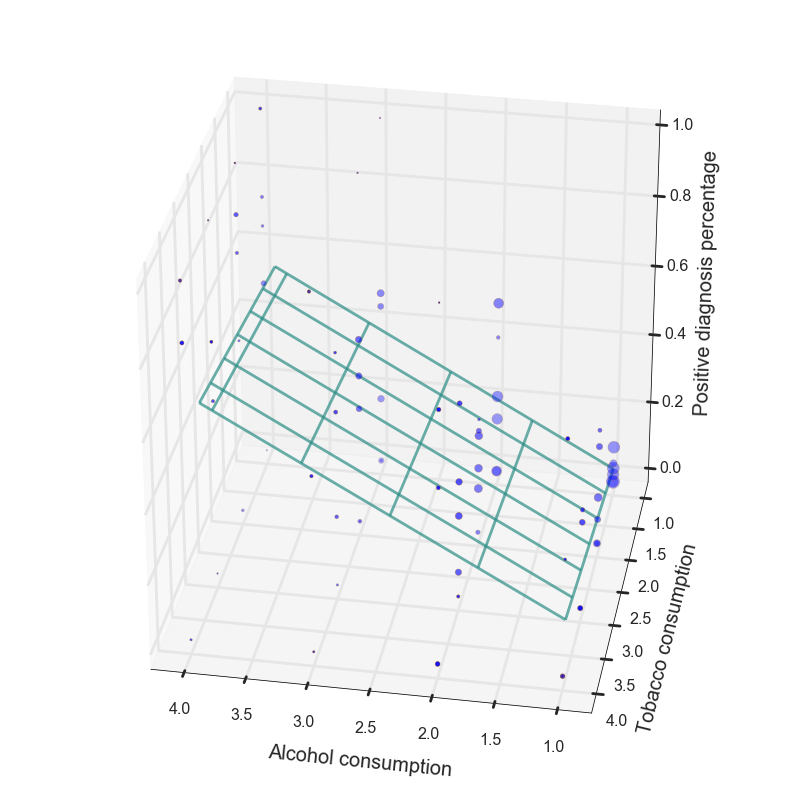

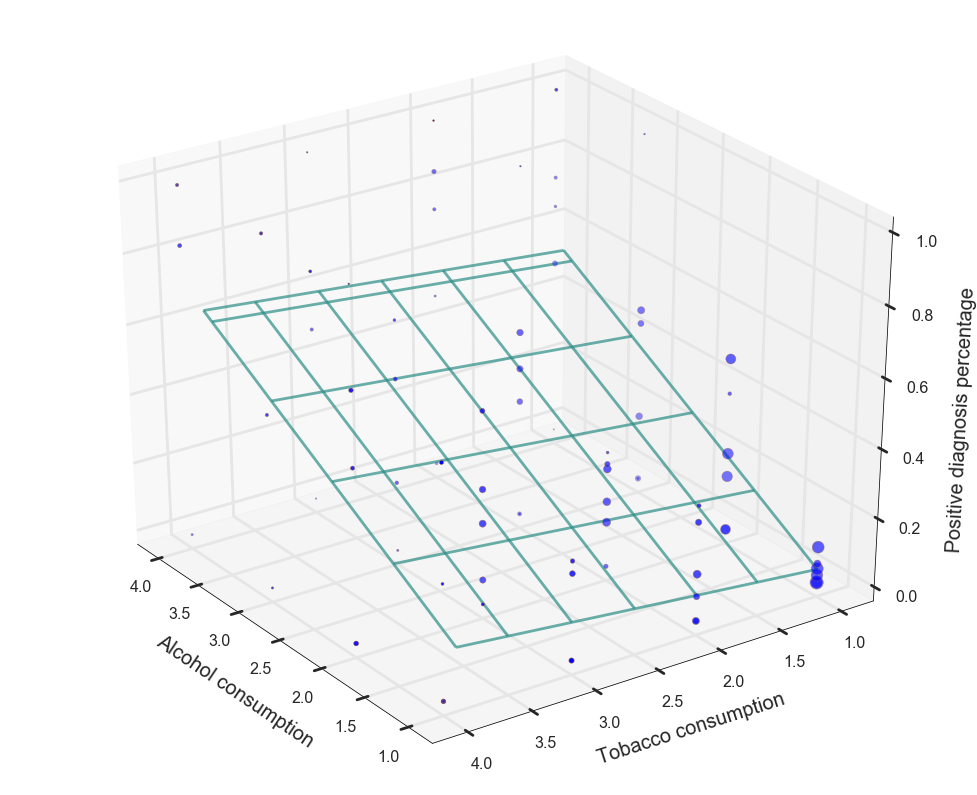

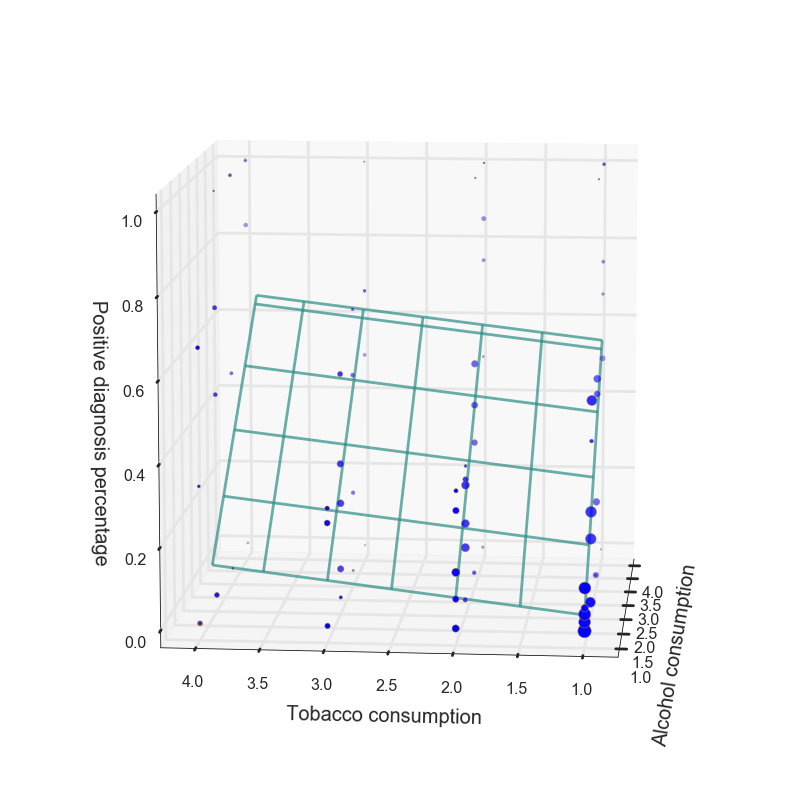

In [305]:
def f_model(x1, x2, model):
    ''' Must feed in x = 'alcohol consumption'
        and y = 'tobacco consumption'. Returns the
        2D hyperplane (a regular plane) of best fit:
        f = m_0 + m_1 x_1 + m_2 x_2 '''
    f = model.params[0] + model.params[1]*x1 + model.params[2]*x2
    return np.float64(f)

def plot_plane(x_points, y_points, z_points, model,
               weights, labels, view):
    fig = plt.figure(figsize=(14,14))
    ax = fig.gca(projection='3d')
    
    pad = 0
    x1, x2 = min(x_points)-pad, max(x_points)+pad
    y1, y2 = min(y_points)-pad, max(y_points)+pad
    
    # set up a meshgrid - like labeling (x,y) coordinates
    # for each vertex on a piece of graph paper
    dx = 0.1
    x = np.arange(x1, x2, dx)
    y = np.arange(y1, y2, dx)
    X, Y = np.meshgrid(x, y)
    
    # define the vertical values Z
    # as the model plane of best fit,
    # Z ends up as a numpy array
    Z = f_model(X, Y, model)
    
    # plot
    ax.plot_wireframe(X, Y, Z, rstride=5, cstride=7,
                      color=colors[-2], alpha=0.7)
    ax.scatter(x_points, y_points, z_points,
               color=colors[1], s=[w*3 for w in weights])
    
    ax.set_xlim(0.8, 4.2)
    ax.set_ylim(0.8, 4.2)
    ax.set_zlim(-0.02, 1.02)
    
    ax.set_xlabel(labels[0], labelpad=25, fontsize=20)
    ax.set_ylabel(labels[1], labelpad=25, fontsize=20)
    ax.set_zlabel(labels[2], labelpad=25, fontsize=20)
    
    ax.view_init(elev=view[0], azim=view[1])

    
plot_plane(df.alcgp, df.tobgp, df.positive_frac, reg, df.ncontrols,
           labels=['Alcohol consumption', 'Tobacco consumption', 'Positive diagnosis percentage'],
           view=[30, 100])
plt.savefig('figures/two_feature_model_3d_1.png', bbox_inches='tight', dpi=144)
plt.show()

plot_plane(df.alcgp, df.tobgp, df.positive_frac, reg, df.ncontrols,
           labels=['Alcohol consumption', 'Tobacco consumption', 'Positive diagnosis percentage'],
           view=[30, 145])
plt.gcf().subplots_adjust(right=1.08)
plt.savefig('figures/two_feature_model_3d_2.png', bbox_inches='tight', dpi=144)
plt.show()

plot_plane(df.alcgp, df.tobgp, df.positive_frac, reg, df.ncontrols,
           labels=['Alcohol consumption', 'Tobacco consumption', 'Positive diagnosis percentage'],
           view=[10, 185])
plt.savefig('figures/two_feature_model_3d_3.png', bbox_inches='tight', dpi=144)
plt.show()

Making the prediction for our sample case (shown above) except ignoring the age - as our model has no age dependence:

#### Two feature linear model without intercept

In [296]:
reg = ols('positive_frac ~ alcgp + tobgp -1', df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          positive_frac   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     75.95
Date:                Fri, 29 Apr 2016   Prob (F-statistic):           9.96e-20
Time:                        22:24:30   Log-Likelihood:                -18.482
No. Observations:                  88   AIC:                             40.96
Df Residuals:                      86   BIC:                             45.92
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
alcgp          0.1442      0.021      6.957      0.000         0.103     0.185
tobgp          0.0036      0.021      0.170      0.865        -0.038     0.045
==============================================================================
Omnibus:                        1.443   Durbin-Watson:                   1.122
Prob(Omnibus):                  0.486   Jarque-Bera (JB):                1.442
Skew:                           0.224   Prob(JB):                        0.486
Kurtosis:                       2.562   Cond. No.                         3.16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [297]:
reg.params

alcgp    0.144220
tobgp    0.003582
dtype: float64

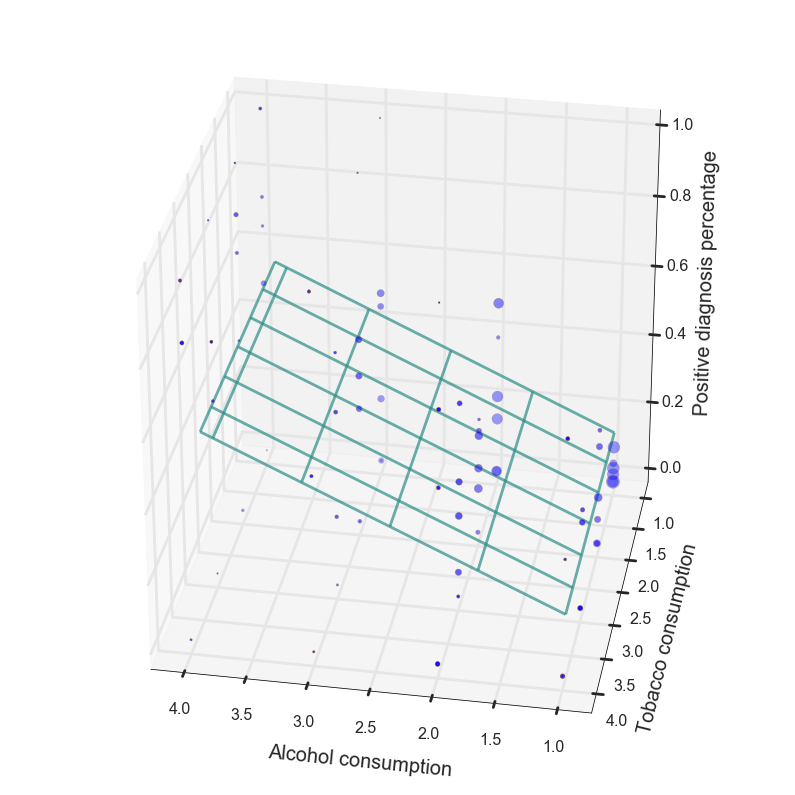

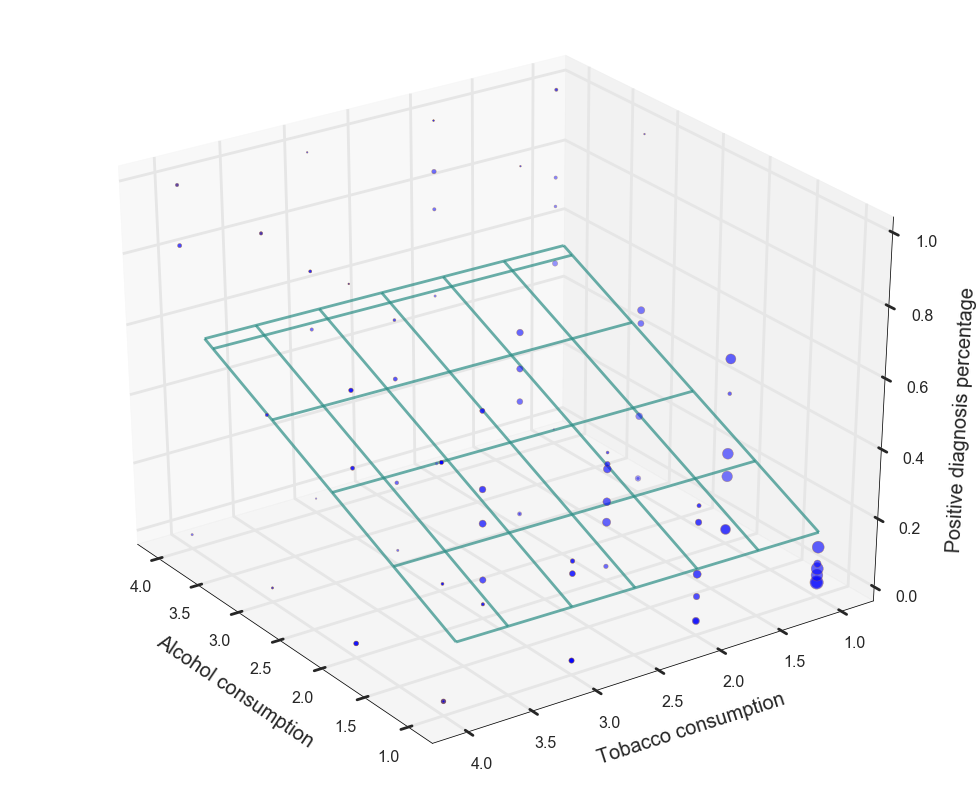

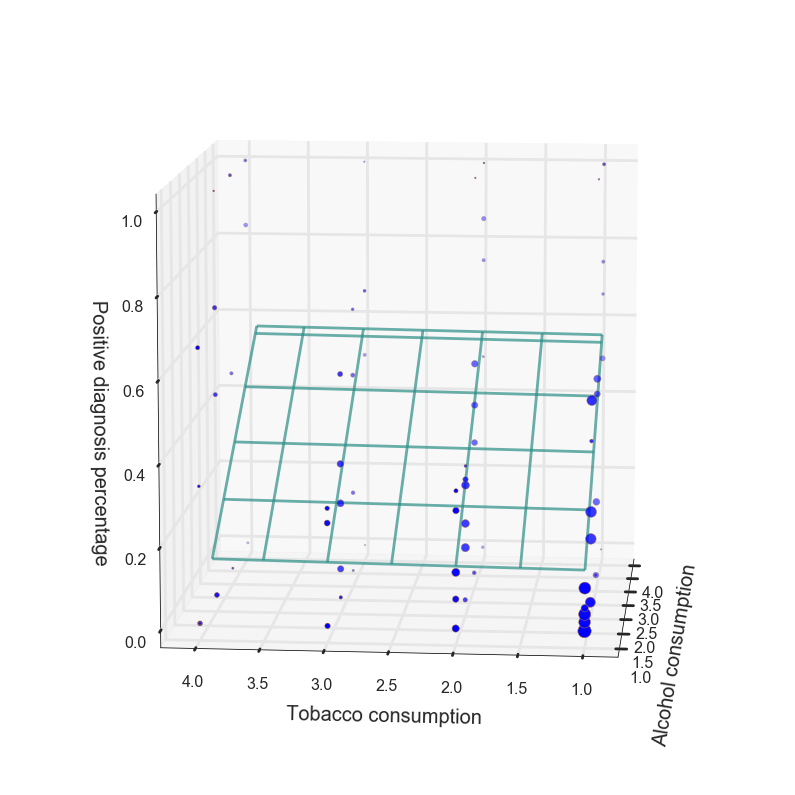

In [302]:
def f_model(x1, x2, model):
    ''' Must feed in x = 'alcohol consumption'
        and y = 'tobacco consumption'. Returns the
        2D hyperplane (a regular plane) of best fit:
        f = m_0 + m_1 x_1 + m_2 x_2 '''
    f = model.params[0]*x1 + model.params[1]*x2
    return np.float64(f)

def plot_plane(x_points, y_points, z_points, model,
               weights, labels, view):
    fig = plt.figure(figsize=(14,14))
    ax = fig.gca(projection='3d')
    
    pad = 0
    x1, x2 = min(x_points)-pad, max(x_points)+pad
    y1, y2 = min(y_points)-pad, max(y_points)+pad
    
    # set up a meshgrid - like labeling (x,y) coordinates
    # for each vertex on a piece of graph paper
    dx = 0.1
    x = np.arange(x1, x2, dx)
    y = np.arange(y1, y2, dx)
    X, Y = np.meshgrid(x, y)
    
    # define the vertical values Z
    # as the model plane of best fit,
    # Z ends up as a numpy array
    Z = f_model(X, Y, model)
    
    # plot
    ax.plot_wireframe(X, Y, Z, rstride=5, cstride=7,
                      color=colors[-2], alpha=0.7)
    ax.scatter(x_points, y_points, z_points,
               color=colors[1], s=[w*3 for w in weights])
    
    ax.set_xlim(0.8, 4.2)
    ax.set_ylim(0.8, 4.2)
    ax.set_zlim(-0.02, 1.02)
    
    ax.set_xlabel(labels[0], labelpad=25, fontsize=20)
    ax.set_ylabel(labels[1], labelpad=25, fontsize=20)
    ax.set_zlabel(labels[2], labelpad=25, fontsize=20)
    
    ax.view_init(elev=view[0], azim=view[1])

    
plot_plane(df.alcgp, df.tobgp, df.positive_frac, reg, df.ncontrols,
           labels=['Alcohol consumption', 'Tobacco consumption', 'Positive diagnosis percentage'],
           view=[30, 100])
plt.savefig('figures/two_feature_model_no_int_3d_1.png', bbox_inches='tight', dpi=144)
plt.show()

plot_plane(df.alcgp, df.tobgp, df.positive_frac, reg, df.ncontrols,
           labels=['Alcohol consumption', 'Tobacco consumption', 'Positive diagnosis percentage'],
           view=[30, 145])
plt.gcf().subplots_adjust(right=1.08)
plt.savefig('figures/two_feature_model_no_int_3d_2.png', bbox_inches='tight', dpi=144)
plt.show()

plot_plane(df.alcgp, df.tobgp, df.positive_frac, reg, df.ncontrols,
           labels=['Alcohol consumption', 'Tobacco consumption', 'Positive diagnosis percentage'],
           view=[10, 185])
plt.savefig('figures/two_feature_model_no_int_3d_3.png', bbox_inches='tight', dpi=144)
plt.show()